# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
%matplotlib inline
#import subprocess
#import sys
#sys.path.insert(0, '../../scripts')
#from ripser_to_dict import *

# Parameters

In [2]:
n_points = 200
seed = 11
dim = 2
threshold = 10
thr = 2

# Functions

In [3]:
def ripser_to_dict(file,thr):
    data = dict()
    data['file'] = file
    

    with open(file, 'r') as f:
        
        # first line
        line = f.readline()
        word = line.split(' ')
        data['nb_neuron'] = int(word[3])
        
        # second line
        line = f.readline()
        word = line.split(' ')
        data['range'] = 'not implemented' #[float(w) for w in word[2][1:-2].split]

        # parse until the end of the line
        for line in f:
            if 'persistence' in line:
                key = int(line[29:-2])
                data[key] = []
            else:
                word = line.split(',')
                if not len(word) == 2:
                    print('Unexpected number of word: ',word)
                    break
                if ' ' in word[1]:
                    word_2 = thr
                else:
                    word_2 = float(word[1][:-2])
                data[key].append([float(word[0][2:]),word_2])
            
    # post processing
    temp = []
    for k,v in data.items():
        if v == []:
            temp.append(k)
        elif type(k) == int:
            data[k] = np.array(v)
            
        for k in temp:
            data.pop(k)
        
        return data

In [4]:
def create_torus_distance_matrix(n_points,seed):
    
    # create random points
    np.random.seed(seed=seed)
    random_points = 2*np.pi*np.random.rand(2,n_points)
    R4_coords = np.zeros((4,n_points))
    R4_coords[0,:] = np.cos(random_points[0,:])
    R4_coords[1,:] = np.sin(random_points[0,:])
    R4_coords[2,:] = np.cos(random_points[1,:])
    R4_coords[3,:] = np.sin(random_points[1,:])
    
    # calculate distances
    distance_matrix = np.zeros((n_points,n_points))
    for i in range(n_points):
        for j in range(n_points):
            distance_matrix[i,j] = np.sqrt(
            (R4_coords[0,i] - R4_coords[0,j])**2
            + (R4_coords[1,i] - R4_coords[1,j])**2
            + (R4_coords[2,i] - R4_coords[2,j])**2
            + (R4_coords[3,i] - R4_coords[3,j])**2)
    return distance_matrix

In [5]:
def plot_persistence(data,thr,dim):
    plt.figure(figsize = (10,10))
    plt.plot([0,thr],[0,thr],'k')
    for d in range(dim+1):
        data_array = np.array(data[d])
        plt.plot(data_array[:,0],data_array[:,1],'x',label='dimension '+str(d))
        data_array = []
    plt.legend(loc=4)
    plt.xlabel('birth')
    plt.ylabel('death')
    #plt.axis('equal')
    #plt.axis([0, thr, 0, thr])
    

# Calculations

In [6]:
distance_matrix = create_torus_distance_matrix(n_points,seed)
print(distance_matrix, np.shape(distance_matrix))

[[ 0.          2.22113521  2.41814785 ...,  1.35027388  2.04935121
   1.39157952]
 [ 2.22113521  0.          2.08852292 ...,  2.22740532  0.75505822
   2.75412789]
 [ 2.41814785  2.08852292  0.         ...,  1.47681747  1.9599981
   1.79711119]
 ..., 
 [ 1.35027388  2.22740532  1.47681747 ...,  0.          1.83236855
   1.24438689]
 [ 2.04935121  0.75505822  1.9599981  ...,  1.83236855  0.          2.57764109]
 [ 1.39157952  2.75412789  1.79711119 ...,  1.24438689  2.57764109  0.        ]] (200, 200)


In [7]:
# export to temporary file
np.savetxt("temp_distance.txt", distance_matrix, delimiter=",")

In [8]:
# go to terminal
#process = subprocess.Popen(['cd ../../../ripser; ./ripser --format distance --dim ', str(dim),' --threshold ', str(threshold), ' ../topology_immersion_Henrik/exercises/exercise_3/temp_distance.txt >> ../topology_immersion_Henrik/exercises/exercise_3/temp_persistence.txt'], stdout=subprocess.PIPE, shell=True)
#proc_stdout = process.communicate()[0]
#print(proc_stdout)

In [9]:
!cd ../../../ripser; \
./ripser --format distance --dim {dim} --threshold {threshold} \
../topology_immersion_Henrik/exercises/exercise_3/temp_distance.txt \
> ../topology_immersion_Henrik/exercises/exercise_3/temp_persistence.txt

In [10]:
# extract data
data = ripser_to_dict('temp_persistence.txt',thr)

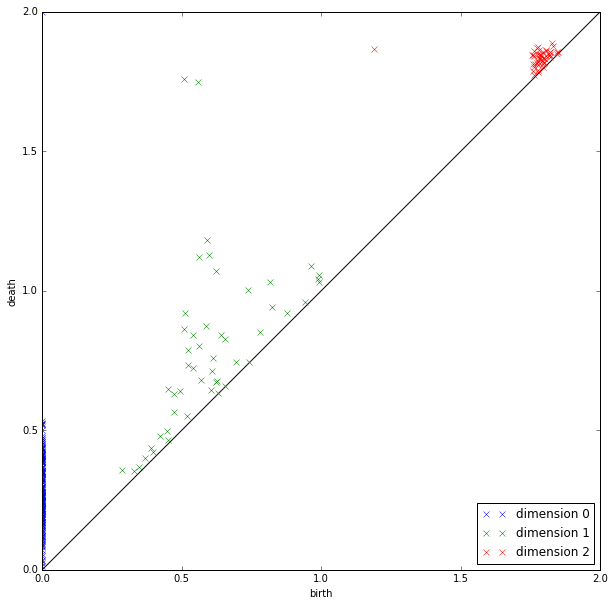

In [11]:
# plot diagrams
plot_persistence(data,thr,dim)